# Tarea 3
## Colapso gravitacional
### David Bernal
### Maria Camila Remolina
### Sergio Hernandez
### Andrés Peñaranda

In [15]:
%pylab inline
import numpy as np
import glob
import os

from mpl_toolkits.mplot3d import Axes3D
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


Se programó en C un código para modelar el colapso gravitacional de un conjunto n de cuerpos con masa=$M_{\odot}$ cada uno, ubicados a una distancia media $<r_{ij}>=1pc$ e inicialmente en posiciones aleatoriamente colocadas en una esfera de radio $R\simeq n^{1/3}$ luego de $5T_{dyn}=5(\frac{1}{\sqrt{G\rho}})$ de interacción gravitacional.

Inicialmente se llevó a cabo una implementación por suma directa, donde en cada diferencia de tiempo se suma para todas las partículas la interacción gravitacional entre ellas y se calcula el avance temporal de cada una de ellas según la interacción
$$\vec{F_{i}}=-\sum\limits_{i \neq j}^n \frac{Gm_{i}m_{j}(\vec{r_i}-\vec{r_j})}{(|\vec{r_i}-\vec{r_j}|^2+\varepsilon^2)^{3/2}} $$
Donde $\varepsilon$ es un parámetro de suavizado tal que la función de fuerzas no diverja cuando 2 cuerpos están muy cerca el uno del otro y define el tiempo mínimo como un tiempo dinámico de una esfera de radio $\varepsilon$.

Debido a que cada paso de tiempo requería de $n^2$ cálculos, se implementó OpenMP para llevar a cabo operaciones en paralelo. El integrador en tiempo fue un Leap-Frog (integrador simpléctico) con avances de 1/2 en $v$, 1 en $p$ y 1/2 en $v$.

Los resultados acá mostrados corresponden a $n=1000$, $\varepsilon=0.1$.

In [41]:
inicial_suma=np.loadtxt('suma_directa/state_inicial_1000.dat')
final_suma=np.loadtxt('suma_directa/state_final_1000.dat')

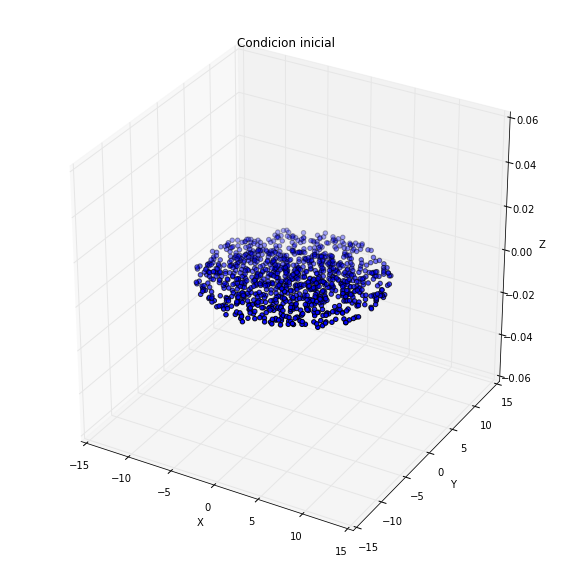

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inicial_suma[:,0],inicial_suma[:,1],inicial_suma[:,3],c='b')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Condicion inicial')

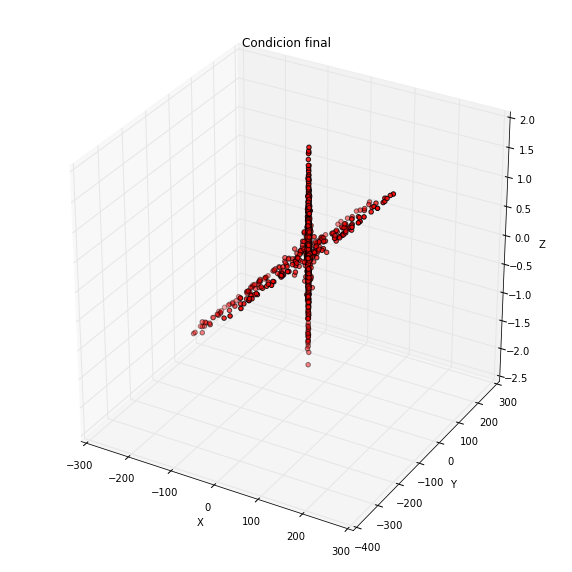

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(final_suma[:,0],final_suma[:,1],final_suma[:,3],c='r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Condicion final')

Este código, utilizando 4 threads en un computador con  procesador i3 tomó 20 minutos en correr. Debido a esto se consideró llevar a cabo otra aproximación al problema.

En esta aproximación se llevó a cabo una aproximación esférica del potencial gravitacional, asumiendo que la furza que sentía cada cuerpo era equivalente a la de toda la masa más cercana al centro que el cuerpo puesta como una masa puntual en dicho centro. Los resultados se muestran a continuación.

In [44]:
inicial=np.loadtxt('state_inicial_1000.dat')
final=np.loadtxt('state_final_1000.dat')

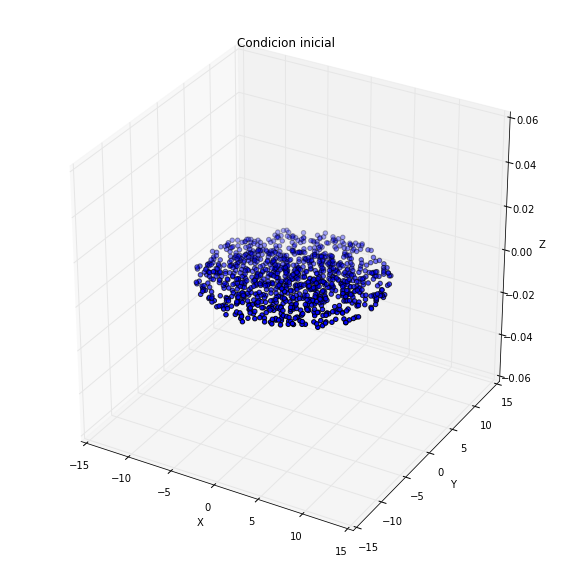

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inicial[:,0],inicial[:,1],inicial[:,3],c='b')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Condicion inicial')

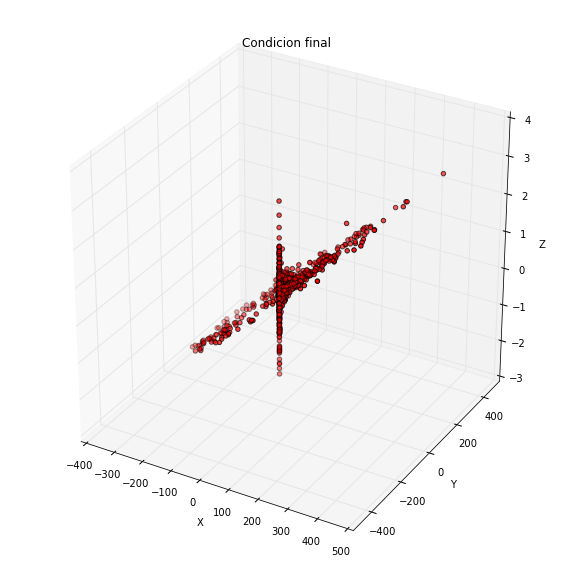

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(final[:,0],final[:,1],final[:,3],c='r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Condicion final')

Se puede observar que se obtuvo una respuesta similar con esta aproximación, y el tiempo computacional se vió reducido considerablemente a aproximadamente un minuto (20x).

Los resultados obtenidos debían ajustarse a que al final del tiempo de simulación hubiera una conservación de la energía del 50% y que la densidad de partículas con respecto al radio se comportara como $$\rho(r) = \frac{\rho_0}{(\frac{r}{r_c})^\alpha (1+\frac{r}{r_c})^\beta}$$

Dichos resultados se pueden observar en lor archivos del repositorio.